# Imports:

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import explore
import prepare

### 1.) Using lemonade.csv dataset and focusing on continuous variables:



In [151]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [152]:
df = pd.read_csv(url)

In [153]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [26]:
def detect_outliers(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    odf = pd.DataFrame()
    df = df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        

        q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
        
        iqr = q3 - q1   # calculate interquartile range
        
        upper_bound = q3 + k * iqr   # get upper bound
        lower_bound = q1 - k * iqr   # get lower bound
        
        # print each col and upper and lower bound for each column
        print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

        # return dataframe of outliers
        odf = odf.append(df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)])
            
    return odf

In [46]:
def show_outliers(df, k, columns):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    recommended k be 1.5 and entered as integer
    '''
    df = df.select_dtypes(include=['int', 'float'])
    for i in columns:
        df = df.select_dtypes(include=['int', 'float'])
        quartile1, quartile3 = np.percentile(df[i], [25,75])
        IQR_value = quartile3 - quartile1
        lower_bound = (quartile1 - (k * IQR_value))
        upper_bound = (quartile3 + (k * IQR_value))
        print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
        

In [117]:
def show_outliers_plot(df, k, columns):
    '''
    calculates the lower and upper bound to locate outliers and displays them
    recommended k be 1.5 and entered as integer
    '''
    df = df.select_dtypes(include=['int', 'float'])
    for i in columns:
        quartile1, quartile3 = np.percentile(df[i], [25,75])
        IQR_value = quartile3 - quartile1
        lower_bound = (quartile1 - (k * IQR_value))
        upper_bound = (quartile3 + (k * IQR_value))
        print(f'For {i} the lower bound is {lower_bound} and  upper bound is {upper_bound}')
        plt.figure(figsize = (16,6))
        plt.subplot(1, 2, 1)
        sns.histplot(data = df, x = df[i], kde=True)
        plt.axvline(lower_bound, c = 'blue')
        plt.axvline(upper_bound, c = 'green')
        plt.title(i)
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x= df[i],whis = k,)
        plt.axvline(lower_bound, c = 'blue')
        plt.axvline(upper_bound, c = 'green')
        plt.show()   
        print('-------------------------------------------------------------------')
        
        
    
        

In [157]:
def detect_outliers(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    odf = pd.DataFrame()
    #df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        if df[col].dtypes != 'O':
            q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
            iqr = q3 - q1   # calculate interquartile range
        
            upper_bound = q3 + k * iqr   # get upper bound
            lower_bound = q1 - k * iqr   # get lower bound
        
            # print each col and upper and lower bound for each column
            print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

            # return dataframe of outliers
            odf = odf.append(df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)])
        
            
    return odf

In [170]:
def detect_outliers_test(df, k, col_list):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed
    '''
    
    #df.select_dtypes(include=['int', 'float'])
    
    for col in col_list:
        if df[col].dtypes != 'O':
            q1, q2, q3 = df[f'{col}'].quantile([.25, .5, .75])  # get quartiles
            iqr = q3 - q1   # calculate interquartile range
        
            upper_bound = q3 + k * iqr   # get upper bound
            lower_bound = q1 - k * iqr   # get lower bound
        
            # print each col and upper and lower bound for each column
            print(f"{col}: Median = {q2} lower_bound = {lower_bound} upper_bound = {upper_bound}")

            # return dataframe of outliers
            
    
            
        
            
    return df[(df[f'{col}'] < lower_bound) | (df[f'{col}'] > upper_bound)]

In [172]:
df1 = detect_outliers_test(df,1.5, df.columns)

Date: Median = 2017-07-02 00:00:00 lower_bound = 2016-07-03 00:00:00 upper_bound = 2018-07-01 00:00:00
Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0


In [174]:
df1.head(50)

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
181,2017-07-01,Saturday,102.9,0.47,59,0.5,143
182,2017-07-02,Sunday,93.4,0.51,68,0.5,158
183,2017-07-03,Monday,81.5,0.54,68,0.5,235
184,2017-07-04,Tuesday,84.2,0.59,49,0.5,534


In [127]:
detect_outliers(df, 1.5, df.columns)

Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0


,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21
364,15.1,2.50,9,0.5,7
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
10,32.6,1.54,23,0.5,12
11,38.2,1.33,16,0.5,14
12,37.5,1.33,19,0.5,15


### a.) Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

For Temperature the lower bound is 16.700000000000003 and  upper bound is 104.7


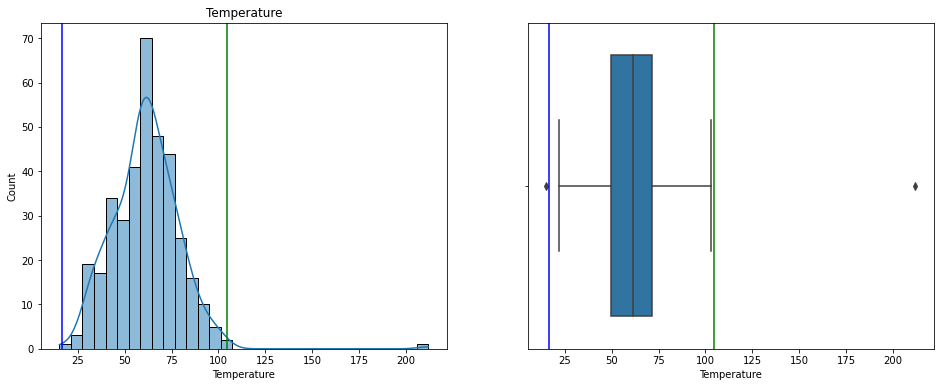

-------------------------------------------------------------------
For Rainfall the lower bound is 0.26 and  upper bound is 1.3


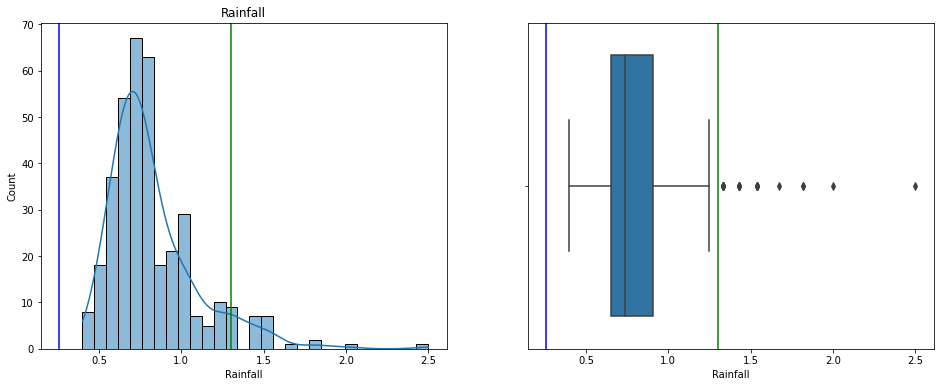

-------------------------------------------------------------------
For Flyers the lower bound is 4.0 and  upper bound is 76.0


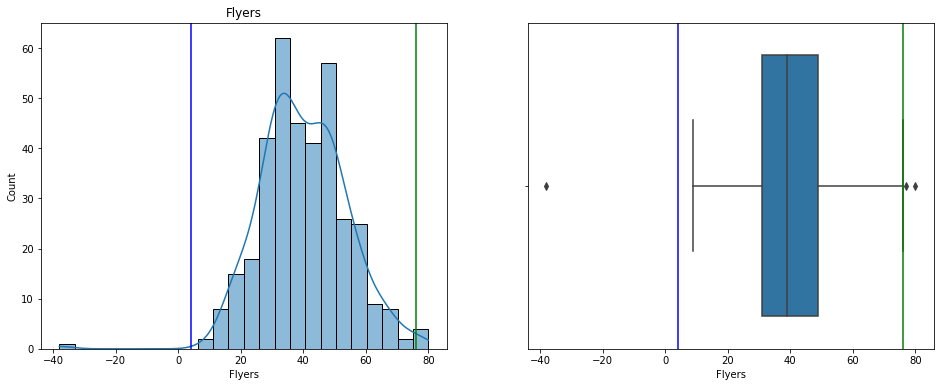

-------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5


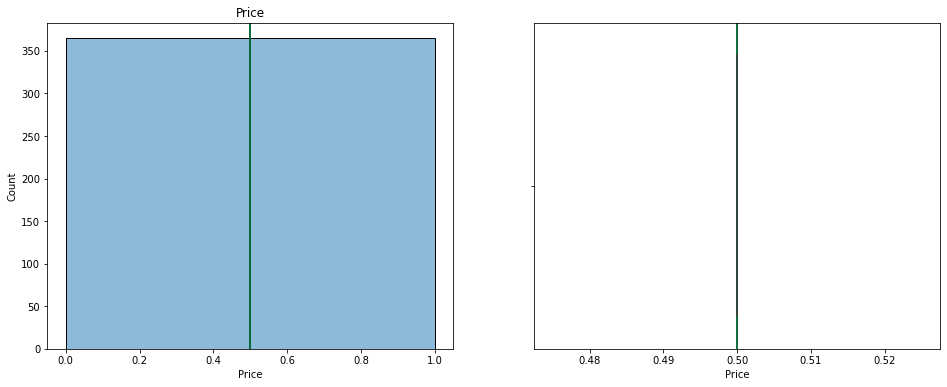

-------------------------------------------------------------------
For Sales the lower bound is 5.0 and  upper bound is 45.0


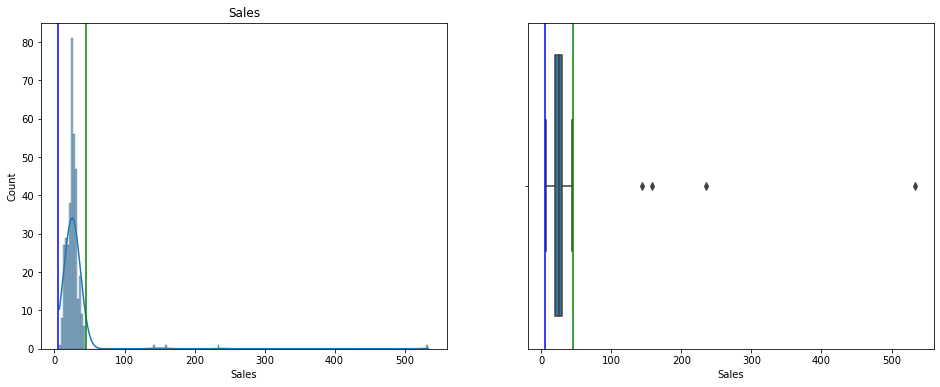

-------------------------------------------------------------------


In [119]:
#function which displays the upper and lower bounds for each numerical columns
show_outliers_plot(df,1.5,df.columns)

In [120]:
# returns a df which is the outlier
odf = detect_outliers(df,1.5,df.columns)

Temperature: Median = 61.1 lower_bound = 16.700000000000003 upper_bound = 104.7
Rainfall: Median = 0.74 lower_bound = 0.26 upper_bound = 1.3
Flyers: Median = 39.0 lower_bound = 4.0 upper_bound = 76.0
Price: Median = 0.5 lower_bound = 0.5 upper_bound = 0.5
Sales: Median = 25.0 lower_bound = 5.0 upper_bound = 45.0


- These outliers do make sense, for temperature the value below the lower bound should be kept. 
- Rainfall doesnt have any outliers outside the lower bound.
- Flyers the outliers below the lower bound do not make sense, you cant have -40 flyers.
- Sales doesnt have any outliers below the lower bound.

### b.) Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

In [121]:
odf.head(100)

,Temperature,Rainfall,Flyers,Price,Sales
41,212.0,0.91,35,0.5,21
364,15.1,2.50,9,0.5,7
0,27.0,2.00,15,0.5,10
1,28.9,1.33,15,0.5,13
2,34.5,1.33,27,0.5,15
5,25.3,1.54,23,0.5,11
6,32.9,1.54,19,0.5,13
10,32.6,1.54,23,0.5,12
11,38.2,1.33,16,0.5,14
12,37.5,1.33,19,0.5,15


- These outliers do not make sense temperature that high would be a global disaster. Drop these.
- There are priods when excessive amounts of rain can occur for an area. It might be a trend you see. Keep outliers.
- Flyers outliers aboive the upper bound do not appear to be excess noise, is plausible they handed out a large amount of flyers during that period. Keep outliers.
- Sales outliers I would keep the outliers because the high sales count was due to a holiday.

### c.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

For Temperature the lower bound is -16.299999999999997 and  upper bound is 137.7


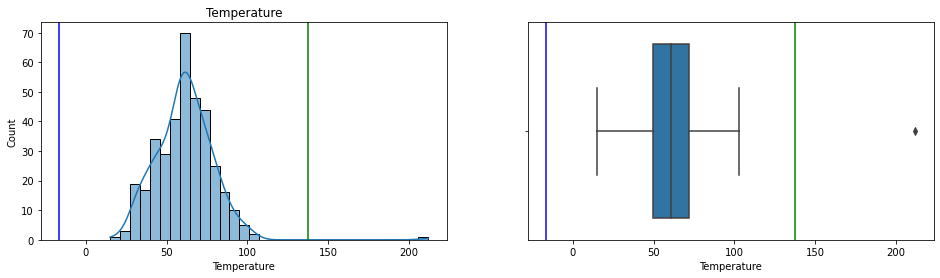

-------------------------------------------------------------------
For Rainfall the lower bound is -0.13 and  upper bound is 1.69


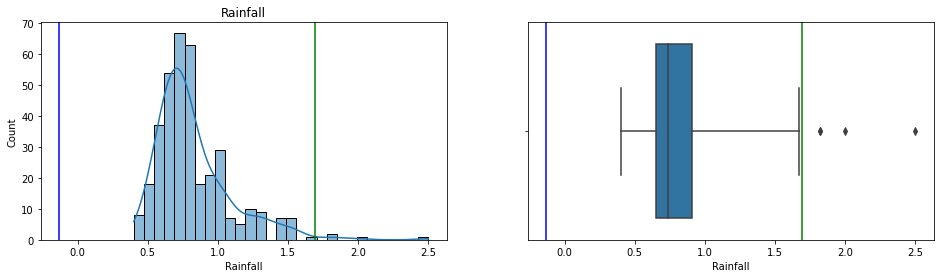

-------------------------------------------------------------------
For Flyers the lower bound is -23.0 and  upper bound is 103.0


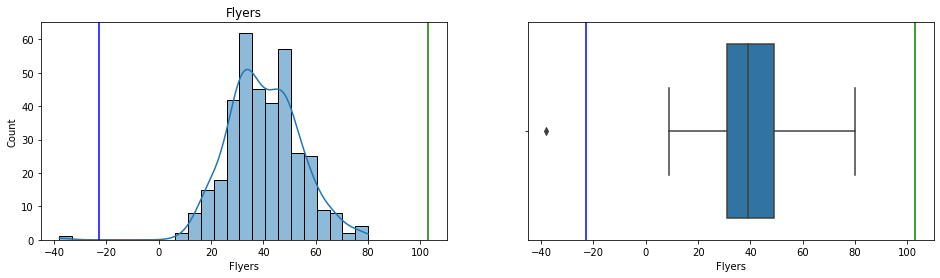

-------------------------------------------------------------------
For Price the lower bound is 0.5 and  upper bound is 0.5


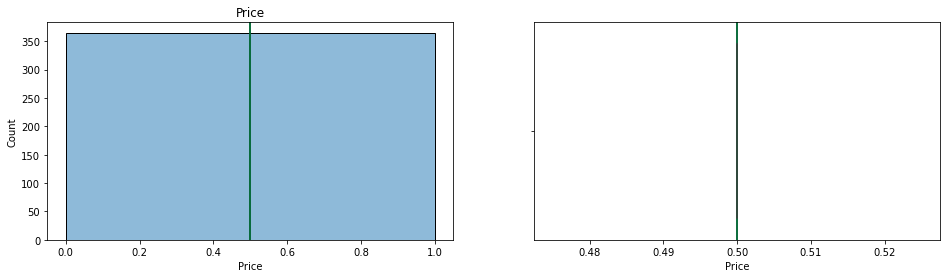

-------------------------------------------------------------------
For Sales the lower bound is -10.0 and  upper bound is 60.0


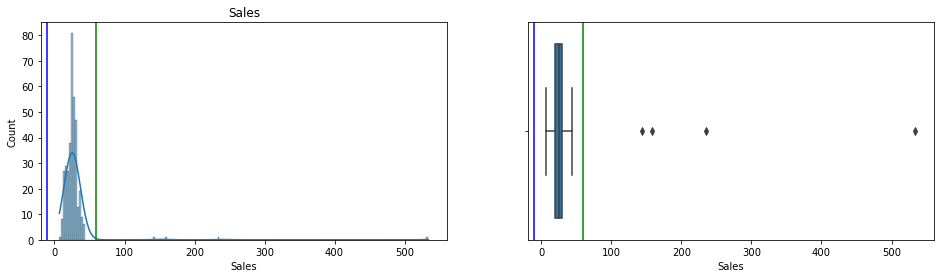

-------------------------------------------------------------------


In [95]:
#function which displays the upper and lower bounds for each numerical columns
show_outliers_plot(df,3,df.columns)

### d.) Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

- These outliers do not make sense temperature that high would be a global disaster. Drop these.
- There are periods when excessive amounts of rain can occur for an area. It might be a trend you see. Keep outliers.
- Flyers outliers aboive the upper bound do not appear to be excess noise, is plausible they handed out a large amount of flyers during that period. Keep outliers.
- Sales outliers I would keep the outliers because the high sales count was due to a holiday.

### 2.) Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:
- Use a 2 sigma decision rule to isolate the outliers.
    - Do these make sense?
    -Should certain outliers be kept or removed?



In [186]:
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

In [187]:
df = pd.read_csv(url)

In [188]:
from numpy import mean
from numpy import std

In [245]:
def outliers_standard_deviation(df, col_list, number_std = 1):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed based on STD
        number_std means number of standard deviations from mean.
    '''
    from numpy import mean
    from numpy import std
    
    for col in col_list:
        if df[col].dtypes != 'O':
            upper = df[col].mean() + (df[col].std()*number_std) 
            lower = df[col].mean() - (df[col].std()*number_std)
            # print each col and upper and lower bound for each column
            print(f"{col}: lower_bound = {lower} upper_bound = {upper}")
            


            # return dataframe of outliers
            
    
            
        
            
    return df[(df[f'{col}'] < lower) | (df[f'{col}'] > upper)]
            
            
            
            
            

In [246]:
outliers_standard_deviation(df, df.columns, 1)

Temperature: lower_bound = 43.13876523594401 upper_bound = 79.31054983254923
Rainfall: lower_bound = 0.5520823357198725 upper_bound = 1.0998628697595811
Flyers: lower_bound = 26.31766499685375 upper_bound = 53.89055418122844
Price: lower_bound = 0.5 upper_bound = 0.5
Sales: lower_bound = -3.082378560982111 upper_bound = 58.813885410297175
temp_zs: lower_bound = -1.0000000000000018 upper_bound = 0.9999999999999981


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zs
0,1/1/17,Sunday,27.0,2.00,15,0.5,10,-1.892340
1,1/2/17,Monday,28.9,1.33,15,0.5,13,-1.787286
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15,-1.477652
4,1/5/17,Thursday,42.4,1.00,33,0.5,18,-1.040848
5,1/6/17,Friday,25.3,1.54,23,0.5,11,-1.986336
6,1/7/17,Saturday,32.9,1.54,19,0.5,13,-1.566119
7,1/8/17,Sunday,37.5,1.18,28,0.5,15,-1.311777
8,1/9/17,Monday,38.1,1.18,20,0.5,17,-1.278602
10,1/11/17,Wednesday,32.6,1.54,23,0.5,12,-1.582706
11,1/12/17,Thursday,38.2,1.33,16,0.5,14,-1.273073


In [243]:
def outliers_standard_deviation_plot(df, col_list, number_std = 1):
    ''' get upper and lower bound for list of columns in a dataframe 
        if desired return that dataframe with the outliers removed based on STD
        number_std means number of standard deviations from mean.
    '''
    from numpy import mean
    from numpy import std
    
    for col in col_list:
        if df[col].dtypes != 'O':
            upper = df[col].mean() + (df[col].std()*number_std) 
            lower = df[col].mean() - (df[col].std()*number_std)
            # print each col and upper and lower bound for each column
            print(f"{col}: lower_bound = {lower} upper_bound = {upper}")
            upper1 = df[col].mean() + (df[col].std()*1) 
            lower1 = df[col].mean() - (df[col].std()*1)
            upper2 = df[col].mean() + (df[col].std()*2) 
            lower2 = df[col].mean() - (df[col].std()*2)
            upper3 = df[col].mean() + (df[col].std()*3) 
            lower3 = df[col].mean() - (df[col].std()*3)
            
            
            plt.figure(figsize = (16,6))
            sns.histplot(data = df, x = df[col], kde=True)
            plt.title(col)
            plt.axvline(upper1, c = 'blue')
            plt.axvline(lower1, c = 'blue')
            plt.axvline(upper2, c = 'green')
            plt.axvline(lower2, c = 'green')
            plt.axvline(upper3, c = 'red')
            plt.axvline(lower3, c = 'red')
            plt.show()
            
            print('-------------------------------------------------------------------')

            # return dataframe of outliers
            
    
            
        
            
    #return df[(df[f'{col}'] < lower) | (df[f'{col}'] > upper)]    
    
    
    
    
    
    return df[(df[f'{col}'] < lower) | (df[f'{col}'] > upper)]

Temperature: lower_bound = 25.052872937641396 upper_bound = 97.39644213085184


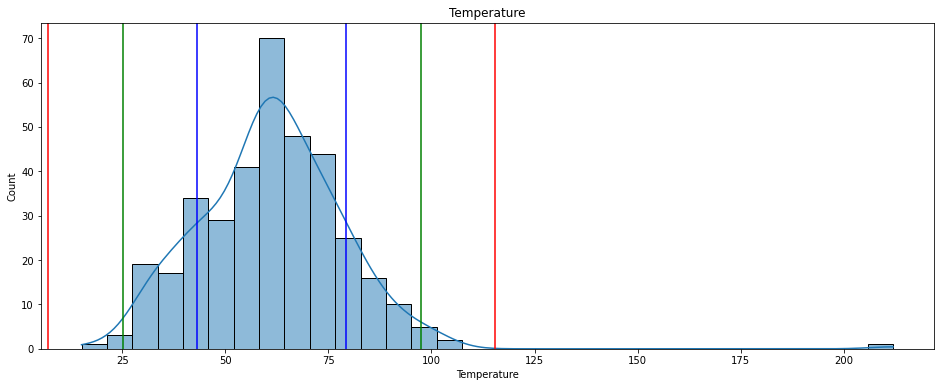

-------------------------------------------------------------------
Rainfall: lower_bound = 0.27819206870001834 upper_bound = 1.3737531367794353


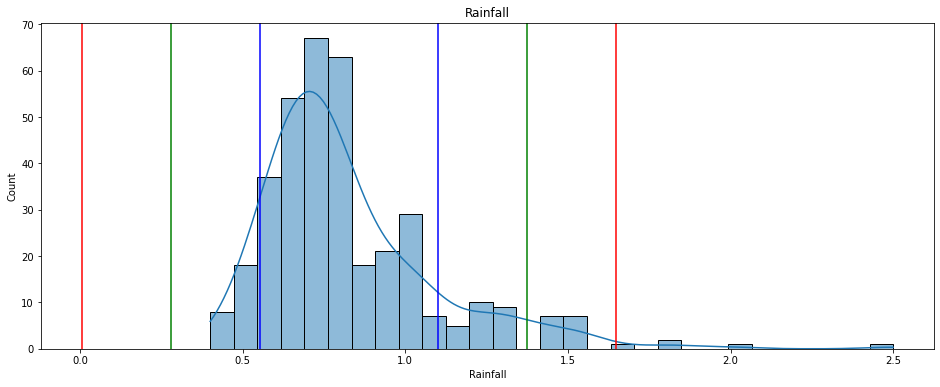

-------------------------------------------------------------------
Flyers: lower_bound = 12.531220404666406 upper_bound = 67.67699877341579


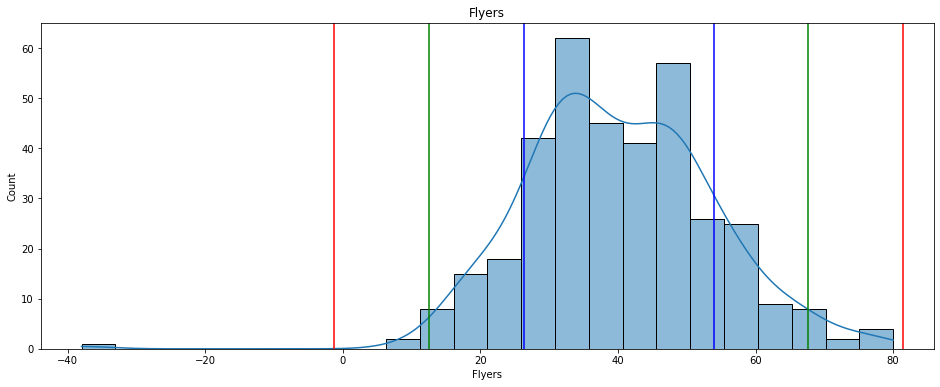

-------------------------------------------------------------------
Price: lower_bound = 0.5 upper_bound = 0.5


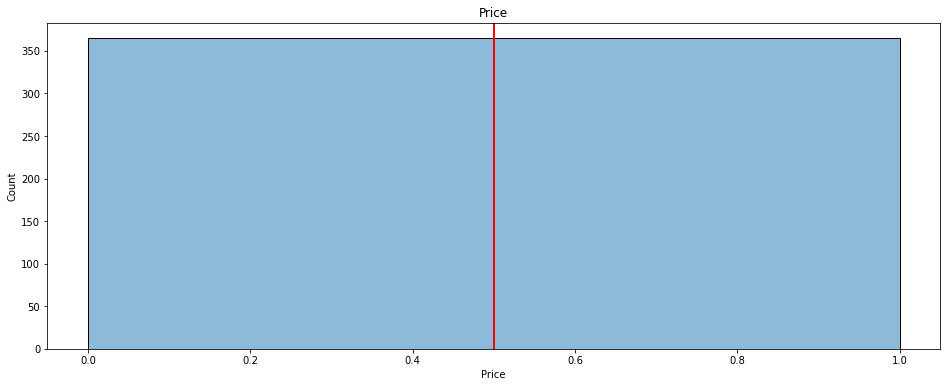

-------------------------------------------------------------------
Sales: lower_bound = -34.030510546621755 upper_bound = 89.76201739593682


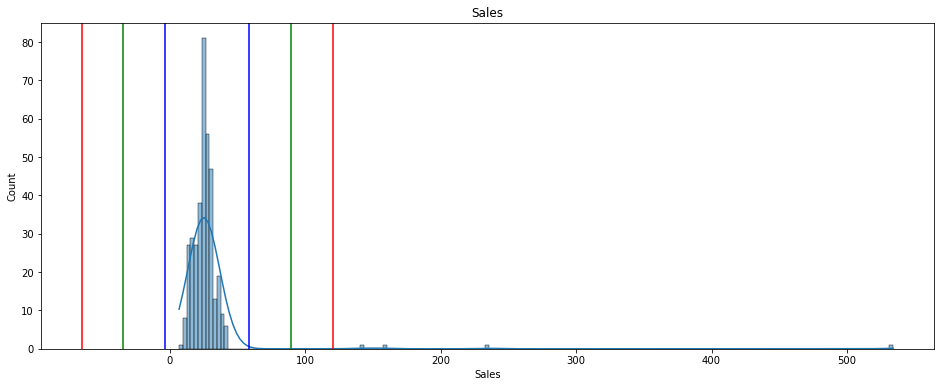

-------------------------------------------------------------------
temp_zs: lower_bound = -2.0000000000000018 upper_bound = 1.9999999999999982


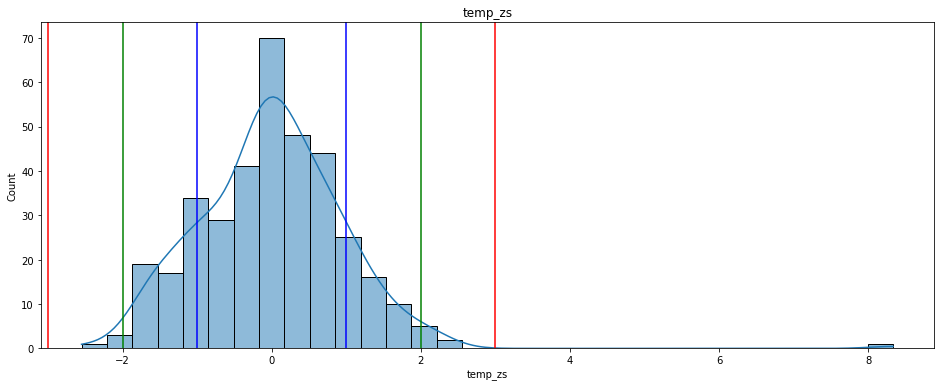

-------------------------------------------------------------------


,Date,Day,Temperature,Rainfall,Flyers,Price,Sales,temp_zs
41,2/11/17,Saturday,212.0,0.91,35,0.5,21,8.336627
166,6/16/17,Friday,99.3,0.47,77,0.5,41,2.105251
176,6/26/17,Monday,102.6,0.47,60,0.5,42,2.287714
181,7/1/17,Saturday,102.9,0.47,59,0.5,143,2.304301
190,7/10/17,Monday,98.0,0.49,66,0.5,40,2.033372
198,7/18/17,Tuesday,99.3,0.47,76,0.5,41,2.105251
202,7/22/17,Saturday,99.6,0.47,49,0.5,42,2.121838
207,7/27/17,Thursday,97.9,0.47,74,0.5,43,2.027843
338,12/5/17,Tuesday,22.0,1.82,11,0.5,10,-2.168799
364,12/31/17,Sunday,15.1,2.50,9,0.5,7,-2.550311


In [244]:
outliers_standard_deviation_plot(df, df.columns, number_std = 2)